    Iteractive widgets to accompany MRS360 Lectures
    Copyright (C) 2016  Simon Biggs

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU Affero General Public License as
    published by the Free Software Foundation, either version 3 of the
    License, or (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU Affero General Public License for more details.

    You should have received a copy of the GNU Affero General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>.

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

from ipywidgets import interact, fixed
from IPython.display import display, clear_output

In [9]:
# np.random.uniform?

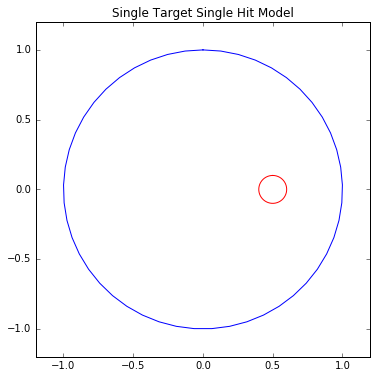

In [28]:
radiation_damage_x = np.random.uniform(low=-1.2, high=1.2, size=(10000,))
radiation_damage_y = np.random.uniform(low=-1.2, high=1.2, size=(10000,))

t = np.linspace(0, 2*np.pi)
cell_x = np.sin(t)
cell_y = np.cos(t)

target_x = 0.1 * np.sin(t) + 0.5
target_y = 0.1 * np.cos(t)

def plot_single_target_single_hit(radiation_damage_events=0):

    plt.figure(figsize=(6,6))
    
    plt.plot(cell_x, cell_y)
    plt.plot(target_x, target_y, c='red')

    plt.scatter(
        radiation_damage_x[0:radiation_damage_events], 
        radiation_damage_y[0:radiation_damage_events], s=2)
    
    target_hit = np.sqrt(
        (radiation_damage_x[0:radiation_damage_events] - 0.5)**2 + 
        (radiation_damage_y[0:radiation_damage_events])**2
    ) <= 0.1
    
    if np.any(target_hit):
        plt.plot([-1.2, 1.2],[-1.2, 1.2], c='red', lw=3)
        plt.plot([-1.2, 1.2],[1.2, -1.2], c='red', lw=3)

    plt.axis('equal')
    
    plt.title('Single Target Single Hit Model')

    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    
interact(plot_single_target_single_hit, radiation_damage_events=(0, 10000));

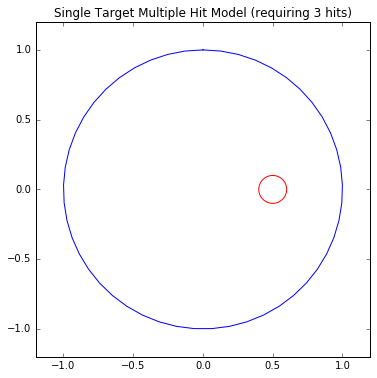

In [30]:
radiation_damage_x = np.random.uniform(low=-1.2, high=1.2, size=(10000,))
radiation_damage_y = np.random.uniform(low=-1.2, high=1.2, size=(10000,))

t = np.linspace(0, 2*np.pi)
cell_x = np.sin(t)
cell_y = np.cos(t)

target_x = 0.1 * np.sin(t) + 0.5
target_y = 0.1 * np.cos(t)

def plot_single_target_multiple_hit(radiation_damage_events=0, hits_required=3):

    plt.figure(figsize=(6,6))
    
    plt.plot(cell_x, cell_y)
    plt.plot(target_x, target_y, c='red')

    plt.scatter(
        radiation_damage_x[0:radiation_damage_events], 
        radiation_damage_y[0:radiation_damage_events], s=2)
    
    target_hit = np.sqrt(
        (radiation_damage_x[0:radiation_damage_events] - 0.5)**2 + 
        (radiation_damage_y[0:radiation_damage_events])**2
    ) <= 0.1
    
    if np.sum(target_hit) >= hits_required:
        plt.plot([-1.2, 1.2],[-1.2, 1.2], c='red', lw=3)
        plt.plot([-1.2, 1.2],[1.2, -1.2], c='red', lw=3)

    plt.axis('equal')
    
    plt.title('Single Target Multiple Hit Model (requiring {} hits)'.format(hits_required))

    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    
interact(plot_single_target_multiple_hit, radiation_damage_events=(0, 10000), hits_required=(1, 20));

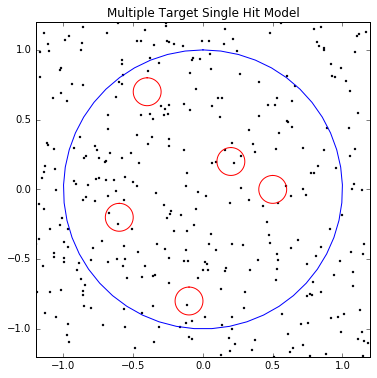

In [39]:
radiation_damage_x = np.random.uniform(low=-1.2, high=1.2, size=(10000,))
radiation_damage_y = np.random.uniform(low=-1.2, high=1.2, size=(10000,))

t = np.linspace(0, 2*np.pi)
cell_x = np.sin(t)
cell_y = np.cos(t)

target_positions = np.array([
        [0.5, 0],
        [0.2, 0.2],
        [-0.6, -0.2],
        [-0.1, -0.8],
        [-0.4, 0.7]
])

targets_plots = {}
for i, pos in enumerate(target_positions):
    targets_plots[i] = {
        "x": 0.1 * np.sin(t) + pos[0],
        "y": 0.1 * np.cos(t) + pos[1]
    }


def plot_multiple_targets_single_hit(radiation_damage_events=0, number_of_targets=3):
    hits_required = 1
    
    plt.figure(figsize=(6,6))
    
    plt.plot(cell_x, cell_y)
    
    for key in range(number_of_targets):
        target_plot = targets_plots[key]
        plt.plot(target_plot["x"], target_plot["y"], c='red')

    plt.scatter(
        radiation_damage_x[0:radiation_damage_events], 
        radiation_damage_y[0:radiation_damage_events], s=2)
    
    target_hits = np.zeros((number_of_targets, radiation_damage_events))
    for i, target_position in enumerate(target_positions[0:number_of_targets, :]):
        target_hits[i, :] = np.sqrt(
            (radiation_damage_x[0:radiation_damage_events] - target_position[0])**2 + 
            (radiation_damage_y[0:radiation_damage_events] - target_position[1])**2
        ) <= 0.1
    
    if np.all(np.sum(target_hits, axis=1) >= hits_required):
        plt.plot([-1.2, 1.2],[-1.2, 1.2], c='red', lw=3)
        plt.plot([-1.2, 1.2],[1.2, -1.2], c='red', lw=3)

    plt.axis('equal')
    
    plt.title('Multiple Target Single Hit Model')

    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    
interact(plot_multiple_targets_single_hit, radiation_damage_events=(0, 10000), number_of_targets=(1, 5));

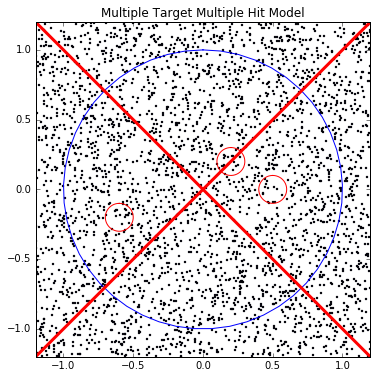

In [71]:
radiation_damage_x = np.random.uniform(low=-1.2, high=1.2, size=(10000,))
radiation_damage_y = np.random.uniform(low=-1.2, high=1.2, size=(10000,))

t = np.linspace(0, 2*np.pi)
cell_x = np.sin(t)
cell_y = np.cos(t)

target_positions = np.array([
        [0.5, 0],
        [0.2, 0.2],
        [-0.6, -0.2],
        [-0.1, -0.8],
        [-0.4, 0.7]
])

targets_plots = {}
for i, pos in enumerate(target_positions):
    targets_plots[i] = {
        "x": 0.1 * np.sin(t) + pos[0],
        "y": 0.1 * np.cos(t) + pos[1]
    }


def plot_multiple_targets_multiple_hit(radiation_damage_events=0, number_of_targets=3, hits_required=3):  
    plt.figure(figsize=(6,6))
    
    plt.plot(cell_x, cell_y)
    
    for key in range(number_of_targets):
        target_plot = targets_plots[key]
        plt.plot(target_plot["x"], target_plot["y"], c='red')

    plt.scatter(
        radiation_damage_x[0:radiation_damage_events], 
        radiation_damage_y[0:radiation_damage_events], s=2)
    
    target_hits = np.zeros((number_of_targets, radiation_damage_events))
    for i, target_position in enumerate(target_positions[0:number_of_targets, :]):
        target_hits[i, :] = np.sqrt(
            (radiation_damage_x[0:radiation_damage_events] - target_position[0])**2 + 
            (radiation_damage_y[0:radiation_damage_events] - target_position[1])**2
        ) <= 0.1
    
    if np.all(np.sum(target_hits, axis=1) >= hits_required):
        plt.plot([-1.2, 1.2],[-1.2, 1.2], c='red', lw=3)
        plt.plot([-1.2, 1.2],[1.2, -1.2], c='red', lw=3)

    plt.axis('equal')
    
    plt.title('Multiple Target Multiple Hit Model')

    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    
interact(
    plot_multiple_targets_multiple_hit, 
    radiation_damage_events=(0, 10000), 
    number_of_targets=(1, 5),
    hits_required=(1, 20)
);

In [179]:
cell_space = 2.4
rows_of_cells = 10
columns_of_cells = 13

max_radiation_damage_events_per_cell = 4000
max_hits_required = 20

cell_positions_x = np.arange(0, columns_of_cells * cell_space, cell_space)
cell_positions_y = np.arange(0, rows_of_cells * cell_space, cell_space)

radiation_damage_x = np.random.uniform(
    low=-cell_space/2, high=cell_space/2, 
    size=(max_radiation_damage_events_per_cell, columns_of_cells, rows_of_cells))
radiation_damage_y = np.random.uniform(
    low=-cell_space/2, high=cell_space/2, 
    size=(max_radiation_damage_events_per_cell, columns_of_cells, rows_of_cells))

t = np.linspace(0, 2*np.pi)
cell_x = np.sin(t)
cell_y = np.cos(t)

target_positions = np.array([
        [0.5, 0],
        [0.2, 0.2],
        [-0.6, -0.2],
        [-0.1, -0.8],
        [-0.4, 0.7]
])

targets_plots = {}
for i, pos in enumerate(target_positions):
    targets_plots[i] = {
        "x": 0.1 * np.sin(t) + pos[0],
        "y": 0.1 * np.cos(t) + pos[1]
    }
    
max_number_of_targets = len(target_positions)
    
target_hit_details = np.zeros(
    (columns_of_cells, rows_of_cells, max_number_of_targets, max_hits_required))
    
for i in range(columns_of_cells): 
    for j in range(rows_of_cells):
        
        target_hits = np.zeros((max_number_of_targets, max_radiation_damage_events_per_cell))
        for k, target_position in enumerate(target_positions):
            target_hits[k, :] = np.sqrt(
                (radiation_damage_x[:, i, j] - target_position[0])**2 + 
                (radiation_damage_y[:, i, j] - target_position[1])**2
            ) <= 0.1
        
        cummulative_sum = np.cumsum(target_hits, axis=1)
        
        for l in range(max_number_of_targets):
            for m in range(max_hits_required):
                find = np.where(cummulative_sum[l] >= m+1)[0]
                if len(find) > 0:
                    target_hit_details[i, j, l, m] = find[0] + 1
                else:
                    target_hit_details[i, j, l, m] = np.inf
                    

death_plot = np.zeros(
    (max_number_of_targets, max_hits_required, max_radiation_damage_events_per_cell))

for i in range(max_number_of_targets):
    for j in range(max_hits_required):
        for k in range(max_radiation_damage_events_per_cell):
            death_plot[i, j, k] = np.sum(np.all(
                    target_hit_details[:,:,0:i+1,j] <= 
                    k, axis=2))

number_of_cells = columns_of_cells * rows_of_cells
survival_fraction = (number_of_cells - death_plot) / number_of_cells
# np.sum(np.all(target_hit_details[:,:,0:2,1] <= 50, axis=2))

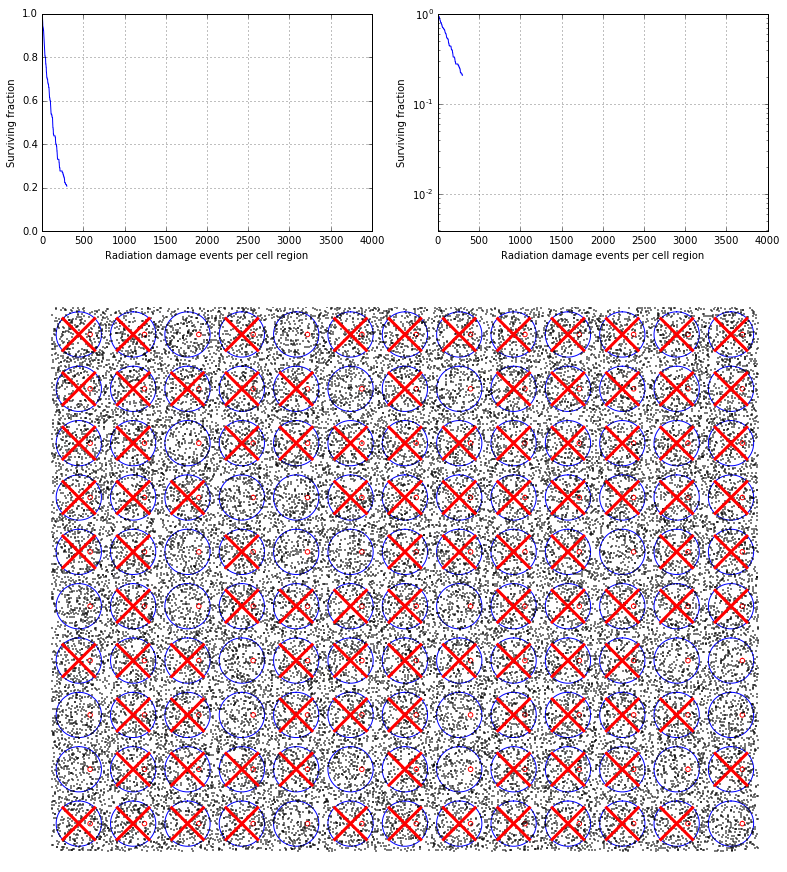

In [187]:
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2.5])

def multiple_cells(radiation_damage_events_per_cell=300, number_of_targets=1, hits_required=1): 
    fig = plt.figure(figsize=(columns_of_cells, rows_of_cells * 1.5))
    ax0 = plt.subplot(gs[0,0])
    ax1 = plt.subplot(gs[0,1])
    ax2 = plt.subplot(gs[1,:])
    
    ax0.plot(survival_fraction[number_of_targets-1, hits_required-1, 0:radiation_damage_events_per_cell])
    ax0.set_xlim([0, max_radiation_damage_events_per_cell])
    ax0.set_ylim([0,1])
    ax0.set_xlabel('Radiation damage events per cell region')
    ax0.set_ylabel('Surviving fraction')
    ax0.grid(True)
    
    
    ax1.semilogy(survival_fraction[number_of_targets-1, hits_required-1, 0:radiation_damage_events_per_cell])
    ax1.set_xlim([0, max_radiation_damage_events_per_cell])
    ax1.set_ylim([0.5 / number_of_cells,1])
    ax1.set_xlabel('Radiation damage events per cell region')
    ax1.set_ylabel('Surviving fraction')
    ax1.grid(True)
    

    for i in range(columns_of_cells):
        for j in range(rows_of_cells):
            cell_position_x = cell_positions_x[i]
            cell_position_y = cell_positions_y[j]

            ax2.plot(cell_x + cell_position_x, cell_y + cell_position_y, c='blue')

            for key in range(number_of_targets):
                target_plot = targets_plots[key]
                plt.plot(
                    target_plot["x"] + cell_position_x, 
                    target_plot["y"] + cell_position_y, c='red')

            ax2.plot(
                radiation_damage_x[0:radiation_damage_events_per_cell, i, j] + cell_position_x, 
                radiation_damage_y[0:radiation_damage_events_per_cell, i, j] + cell_position_y, 'k.', ms=2)

            if np.all(target_hit_details[i,j,0:number_of_targets,hits_required-1] <= radiation_damage_events_per_cell):
                ax2.plot([-0.7, 0.7] + cell_position_x, [-0.7, 0.7] + cell_position_y, c='red', lw=3)
                ax2.plot([-0.7, 0.7] + cell_position_x, [0.7, -0.7] + cell_position_y, c='red', lw=3)

    ax2.axis('equal')
    ax2.axis('off')
    ax2.set_xlim([-cell_space/2, cell_space * (columns_of_cells - 0.5)])
    ax2.set_ylim([-cell_space/2, cell_space * (rows_of_cells - 0.5)])
    

interact(
    multiple_cells, 
    radiation_damage_events_per_cell=(0, max_radiation_damage_events_per_cell), 
    number_of_targets=(1, max_number_of_targets),
    hits_required=(1, max_hits_required));